<center><h1>Data Preparation and Exploratory Data Analysis (EDA)</h1></center> 

First, it is described the general aspects of the dataset. Then, the missing data is imputed. It is commented distribution plots before and after imputation. Finally, the scaling of the data and the visualization of the correlations between variables were carried out.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.getcwd()

'C:\\Users\\marco\\OneDrive\\Escritorio\\ESTUDIOS\\master ciencia de datos\\Practicas IFCA'

Loading the dataset

In [3]:
dfCreditCard = pd.read_excel('.\datasets\creditCard.xlsx')

Printing the first 10 values of the Dataframe.

In [4]:
dfCreditCard.head(10)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
9,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0


Formatting dataframe

In [5]:
dfCreditCard = dfCreditCard.iloc[1:,1:]
dfCreditCard.head(10)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
9,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
10,20000,1,3,2,35,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,0


- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
-  X2: Gender (1 = male; 2 = female).
-  X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
-  X4: Marital status (1 = married; 2 = single; 3 = others).
-  X5: Age (year).
-  X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
-  X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
-  X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

Obtaining information about data count, null values, data types, etc.

In [6]:
dfCreditCard.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X1      30000 non-null  object
 1   X2      30000 non-null  object
 2   X3      30000 non-null  object
 3   X4      30000 non-null  object
 4   X5      30000 non-null  object
 5   X6      30000 non-null  object
 6   X7      30000 non-null  object
 7   X8      30000 non-null  object
 8   X9      30000 non-null  object
 9   X10     30000 non-null  object
 10  X11     30000 non-null  object
 11  X12     30000 non-null  object
 12  X13     30000 non-null  object
 13  X14     30000 non-null  object
 14  X15     30000 non-null  object
 15  X16     30000 non-null  object
 16  X17     30000 non-null  object
 17  X18     30000 non-null  object
 18  X19     30000 non-null  object
 19  X20     30000 non-null  object
 20  X21     30000 non-null  object
 21  X22     30000 non-null  object
 22  X23     30000 non-null

Printing general drescriptive statistics.

In [7]:
dfCreditCard.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,...,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,81,2,7,4,56,11,11,11,11,10,...,21548,21010,20604,7943,7899,7518,6937,6897,6939,2
top,50000,2,2,2,29,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,3365,18112,14030,15964,1605,14737,15730,15764,16455,16947,...,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


Searching duplicated values

In [8]:
dfCreditCard.duplicated().sum() #explicar que no tienen que ser iguales

35

In [9]:
dfCreditCard = dfCreditCard.drop_duplicates()

Proportion of classes:

Default payment: No (y = 0)

In [10]:
len(dfCreditCard.loc[dfCreditCard["Y"] == 0,["Y"]])

23335

Default payment: Yes (y = 1)

In [11]:
len(dfCreditCard.loc[dfCreditCard["Y"] == 1,["Y"]])

6630

Fixing errors.

In [12]:
dfCreditCard["X3"].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=object)

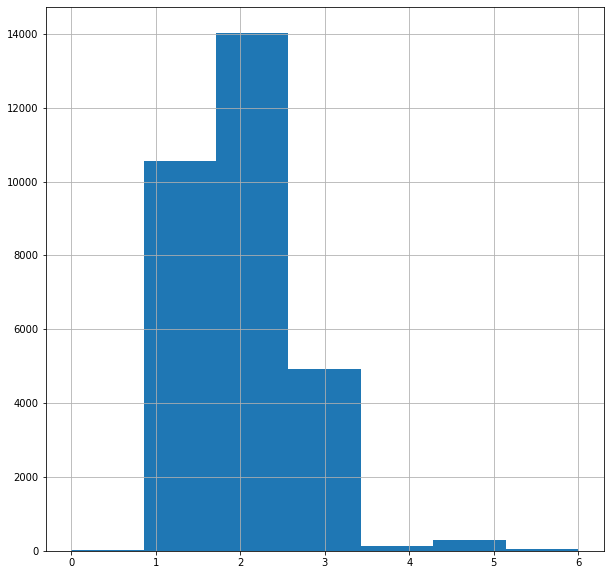

In [13]:
num_bins = len(dfCreditCard['X3'].unique())
dfCreditCard['X3'].hist(bins=num_bins,figsize = (10,10))
plt.show()

In [14]:
dfCreditCard["X3"] = dfCreditCard["X3"].replace([0, 5, 6], 4)

In [15]:
dfCreditCard["X3"].unique()

array([2, 1, 3, 4], dtype=int64)

In [16]:
dfCreditCard["X4"].unique()

array([1, 2, 3, 0], dtype=object)

In [17]:
dfCreditCard["X4"] = dfCreditCard["X4"].replace(0, 3)

In [18]:
dfCreditCard["X7"].unique()

array([2, 0, -1, -2, 3, 5, 7, 4, 1, 6, 8], dtype=object)

Setting as int64 type categorical variables and float the numerical ones.

In [19]:
dfCreditCard.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29965 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X1      29965 non-null  object
 1   X2      29965 non-null  object
 2   X3      29965 non-null  int64 
 3   X4      29965 non-null  int64 
 4   X5      29965 non-null  object
 5   X6      29965 non-null  object
 6   X7      29965 non-null  object
 7   X8      29965 non-null  object
 8   X9      29965 non-null  object
 9   X10     29965 non-null  object
 10  X11     29965 non-null  object
 11  X12     29965 non-null  object
 12  X13     29965 non-null  object
 13  X14     29965 non-null  object
 14  X15     29965 non-null  object
 15  X16     29965 non-null  object
 16  X17     29965 non-null  object
 17  X18     29965 non-null  object
 18  X19     29965 non-null  object
 19  X20     29965 non-null  object
 20  X21     29965 non-null  object
 21  X22     29965 non-null  object
 22  X23     29965 non-null

In [20]:
dfCreditCard["X1"] = dfCreditCard["X1"].astype(float)

In [21]:
dfCreditCard["X2"] = dfCreditCard["X2"].astype(int)

In [22]:
dfCreditCard["X5"] = dfCreditCard["X5"].astype(float)

In [23]:
for i in range(6, 12):
    dfCreditCard[f"X{i}"] = dfCreditCard[f"X{i}"].astype(int)

In [24]:
for i in range(12, 24):
    dfCreditCard[f"X{i}"] = dfCreditCard[f"X{i}"].astype(float)

In [25]:
dfCreditCard["Y"] = dfCreditCard["Y"].astype(int)

In [26]:
dfCreditCard.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29965 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      29965 non-null  float64
 1   X2      29965 non-null  int32  
 2   X3      29965 non-null  int64  
 3   X4      29965 non-null  int64  
 4   X5      29965 non-null  float64
 5   X6      29965 non-null  int32  
 6   X7      29965 non-null  int32  
 7   X8      29965 non-null  int32  
 8   X9      29965 non-null  int32  
 9   X10     29965 non-null  int32  
 10  X11     29965 non-null  int32  
 11  X12     29965 non-null  float64
 12  X13     29965 non-null  float64
 13  X14     29965 non-null  float64
 14  X15     29965 non-null  float64
 15  X16     29965 non-null  float64
 16  X17     29965 non-null  float64
 17  X18     29965 non-null  float64
 18  X19     29965 non-null  float64
 19  X20     29965 non-null  float64
 20  X21     29965 non-null  float64
 21  X22     29965 non-null  float64
 22

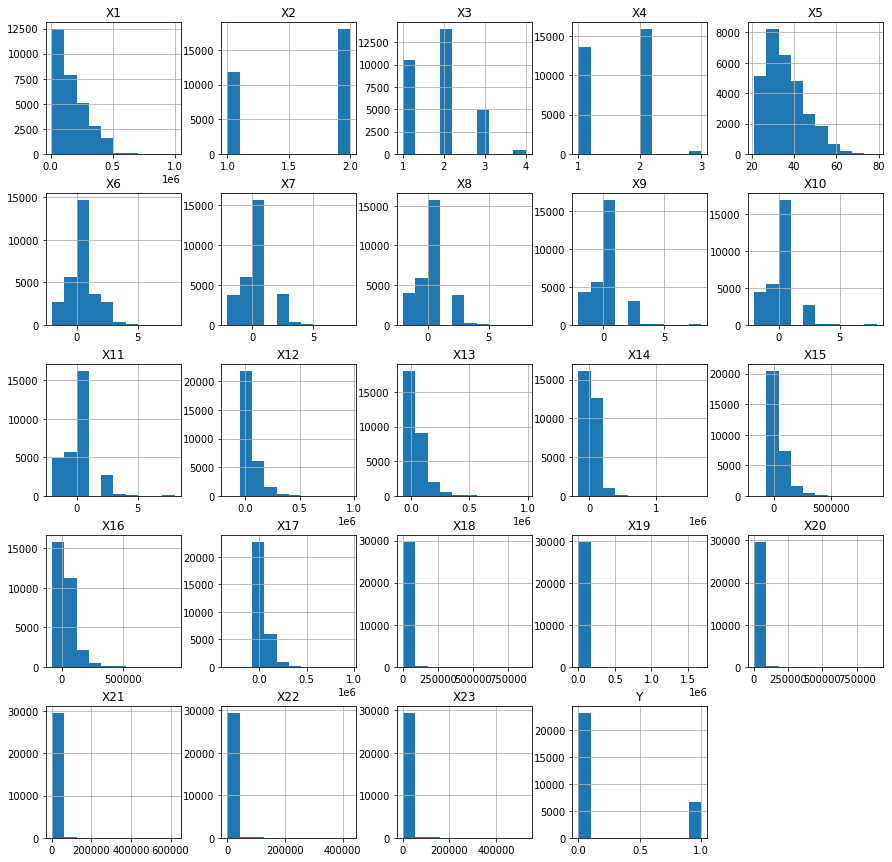

In [27]:
histRaw = dfCreditCard.hist(figsize = (15,15))

Scaling numerical data (avoiding categorical ones)

In [28]:
from sklearn.preprocessing import MinMaxScaler

# getting a list of numerical column names
num_cols = list(dfCreditCard.select_dtypes(include=['float64']).columns)

# creating a scaler and fit it to the numerical data
scaler = MinMaxScaler()
dfCreditCard[num_cols] = scaler.fit_transform(dfCreditCard[num_cols])

Saving in a CSV.

In [29]:
dfCreditCard.to_csv(".\datasets\creditCard.csv",index=False)